In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import os
import pickle

## Cosine Contact Rate Model

Comparing simulation results of CTMC SIR model with contact rate
$$
B(t) = A + C\cos(t).
$$
We compare the simulations to our novel ODE approximation model given by the solution to 
$$
\frac{dq}{dt} = -q^2 + (B(t) + \mu)q - \mu.
$$
In this application, we consider the contact rate function $B(t)$ with parameter values $A = 1.4, C = 1$ and removal parameter $\mu = 1$.

In [2]:
A = 1.4
a = 1
mu = 1

def rate(t, A, a):
    # contact rate for the model
    return A + a*np.cos(t)

In [3]:
os.chdir("cycle_data/")

In this notebook, we parse the simulation data for a single cycle (having pre-parsed the first two on Google Colab) and produce the figures for the report.

In [4]:
# importing all the simulation data from the Gillespie Algorithm.

# - See ipynb file titled ""

prob_list_2 = pd.read_pickle("cosine_prob_list.pickle") # first two cycles - preparsed
with open("third_cycle_data.pickle", "rb") as file: # import final cycle
    third_cycle = pickle.load(file)
    
full_data = third_cycle.copy()
third_cycle.clear()

# parsing all simulation data to find the empirical probability of a major epidemic

major_epi = {}
major_epi_threshold = 100 # classify realisation as major epidemic if above this value
for idx in list(full_data):
    major_epi[idx] = []
    for i in range(len(full_data[idx])):
        total_infec = full_data[idx][i][-1]
        if total_infec >  major_epi_threshold:
            major_epi[idx].append(1)
        else:
            major_epi[idx].append(0)

In [5]:
prob_list = []
for idx in list(full_data):
    major = np.sum(major_epi[idx])
    total_sims = len(major_epi[idx])
    prob_list.append(1 - major / total_sims)
    
sims = np.asarray(prob_list_2 + prob_list) # appending all simulation data together

Text(0.5, 1.0, 'Prob of no Major Epidemic - Simulation')

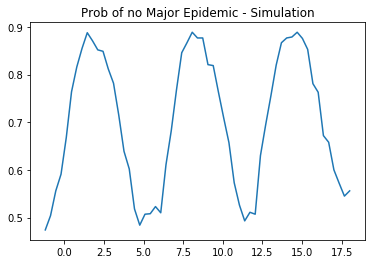

In [15]:
t_range = np.linspace(-1.2, 18, 59) # time range simulations were performed over

plt.plot(t_range, sims)
plt.title("Prob of no Major Epidemic - Simulation")

In [13]:
# importing the solution to our ODE approximation (solved using MATLABs ode45)

ode_sol = pd.read_csv("../data/cycle_model_soln.csv", header = None) # see MATLAB file labelled 
ode_time = pd.read_csv("../data/time_cycle_model_soln.csv", header = None)

# calculating the instantenous rate

instant_rate = np.minimum(1, mu / rate(np.linspace(0,20, 100), A, a))

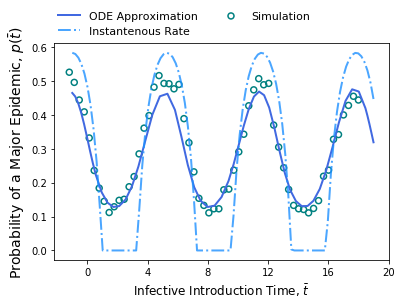

In [14]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots()

ax.scatter(t_range, 1 - sims, marker = "o", label = "Simulation", color = "teal", facecolors = "none", linewidth = 1.5)
#ax.plot(t_range, 1 - sims, label = "Simulation", color = "gray")
ax.plot(ode_time, 1 - ode_sol, label = "ODE Approximation", color = "royalblue", linewidth = 2)
ax.plot(np.linspace(-1, 19, 100), 1 - instant_rate, linestyle = "-.", alpha = 0.8, label = "Instantenous Rate", color = "dodgerblue", linewidth = 2)
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
            borderaxespad=0, frameon=False, fontsize = 11)
ax.set_ylabel("Probability of a Major Epidemic, $p(\\bar{t})$", fontsize = 14)
ax.set_xlabel("Infective Introduction Time, $\\bar{t}$", fontsize = 12)

loc = plticker.MultipleLocator(base=20/5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
#plt.savefig("../imgs/cosine_prob_epidemic_final.pdf", bbox_inches = "tight")

In [13]:
# importing sample simulation data


with open("../data/s_sample_cosine.pkl", "rb") as f:
    S = pickle.load(f)
with open("../data/i_sample_cosine.pkl", "rb") as f:
    I = pickle.load(f)
with open("../data/r_sample_cosine.pkl", "rb") as f:
    R = pickle.load(f)
with open("../data/t_sample_cosine.pkl", "rb") as f:
    t = pickle.load(f)

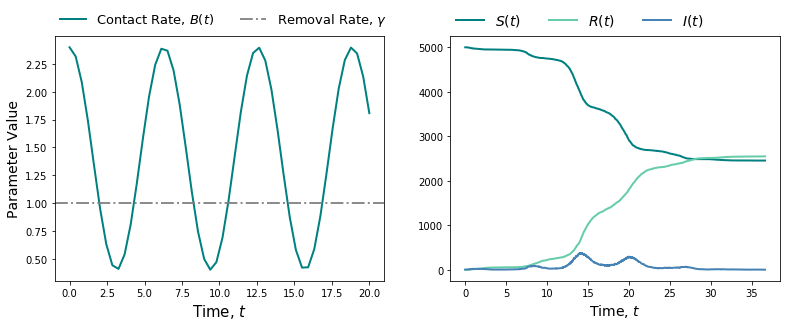

In [28]:
# plotting contact and sample simulation


f, [ax1, ax2]= plt.subplots(1, 2, figsize = (13,4.5))


ax1.plot(np.linspace(0, 20), rate(np.linspace(0, 20), A, a), label =  "Contact Rate, $B(t)$", color = "teal", linewidth = 2)
ax1.axhline(1, linestyle = "-.", alpha = 0.9, color = "gray", label = "Removal Rate, $\gamma$", linewidth = 2)
ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
            borderaxespad=0, frameon=False, fontsize = 13)
ax1.set_xlabel("Time, $t$", fontsize = 15)
ax1.set_ylabel("Parameter Value", fontsize = 14)

ax2.plot(t, S, label = "$S(t)$", linewidth = 2, color = "teal")
ax2.plot(t, R, label = "$R(t)$", linewidth = 2, color = "mediumaquamarine")
ax2.plot(t, I, label = "$I(t)$", linewidth = 2, color = "steelblue")
ax2.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, 
            borderaxespad=0, frameon=False, fontsize = 14)
ax2.set_xlabel("Time, $t$", fontsize = 14)


#plt.savefig("../imgs/cosine_contact_rate.pdf", bbox_inches = "tight")